<hr style="margin-bottom: 50px;">
<center>
    <h1 style="margin-top: 0; margin-bottom: 0;">
        <b><u>Logistic Regression</u></b>
    </h1>
</center>
<hr style="margin-top: 50px;">


In [122]:
import config, src

import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

In [123]:
data = src.load_data(config.PROCESSED_DATA_COMBINED_RAP_HIPHOP_FILE)

X_train, X_test, y_train, y_test = src.split_data(data, target_column='music_genre')

class_weight = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train,
)
class_weight = dict(zip(np.unique(y_train), class_weight))

Données chargées avec succès.


In [124]:
logreg_classifier = LogisticRegression(random_state=0, class_weight=class_weight)
logreg_classifier.fit(X_train, y_train)

LogisticRegression(class_weight={np.int64(0): np.float64(1.0701870734201),
                                 np.int64(1): np.float64(1.0715194776449757),
                                 np.int64(2): np.float64(1.0766130153170432),
                                 np.int64(3): np.float64(1.077421688087687),
                                 np.int64(4): np.float64(1.0980408834453232),
                                 np.int64(5): np.float64(1.0641004505989669),
                                 np.int64(6): np.float64(1.0741942641593165),
                                 np.int64(7): np.float64(0.6427516388681437),
                                 np.int64(8): np.float64(1.06594555913357)},
                   random_state=0)

----------------------------------------------------------------------------------------------------

Global accuracy : 0.33667251884746463
Global log loss : 1.7952006297618277
Global precision : 0.33712303068530075
Global recall : 0.3308199921280073
Global F1 score : 0.3070141132898196
Global ROC-AUC score : 0.7637280767455531

              Precision    Recall  F1 score
Alternative   0.222222  0.120531  0.156291
Anime         0.413197  0.655488  0.506876
Blues         0.396226  0.020937  0.039773
Classical     0.582059  0.567594  0.574736
Country       0.251082  0.321924  0.282124
Electronic    0.255521  0.254184  0.254851
Jazz          0.248322  0.223340  0.235169
Rap/Hip-Hop   0.440752  0.409435  0.424517
Rock          0.224726  0.403946  0.288790

----------------------------------------------------------------------------------------------------


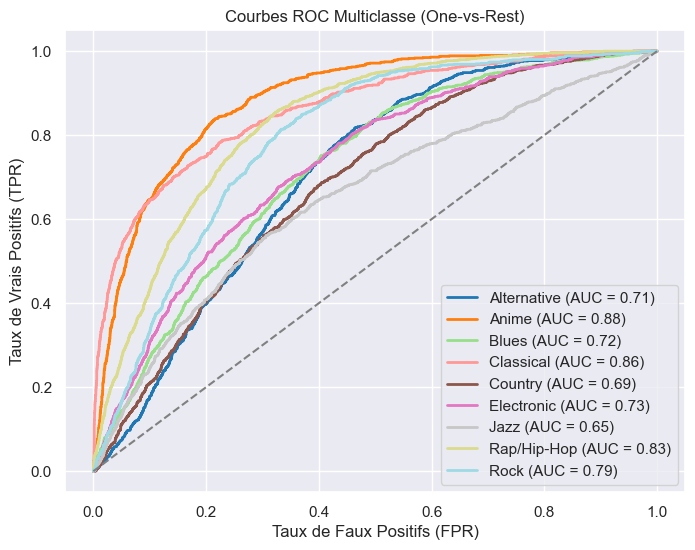

----------------------------------------------------------------------------------------------------


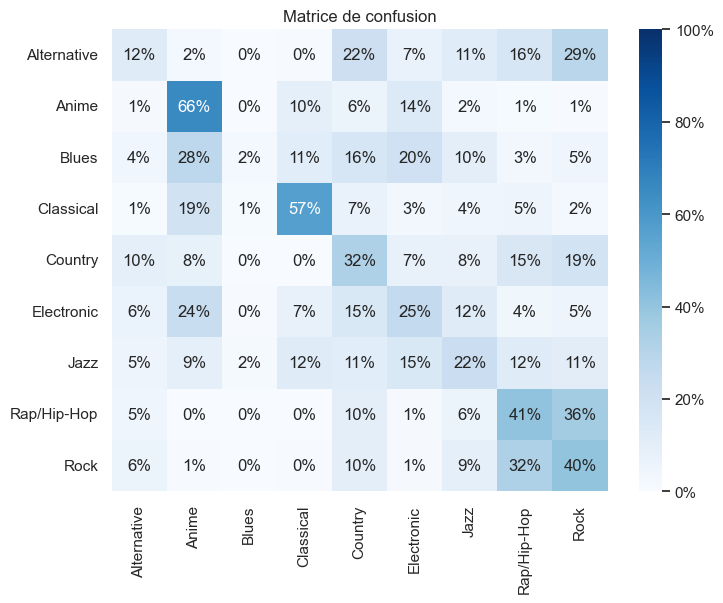

----------------------------------------------------------------------------------------------------


In [125]:
src.evaluate_model(logreg_classifier, X_test, y_test, classes=config.CLASSES_COMBINED_RAP_HIPHOP)

In [126]:
params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [200, 300, 500],
    'tol': [1e-4, 1e-3, 1e-2],
}

In [ ]:
cv_strat = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

rs_logreg_classifier = RandomizedSearchCV(
    estimator=LogisticRegression(random_state=0, class_weight=class_weight),
    param_distributions=params,
    n_iter=50,
    scoring='accuracy',
    n_jobs=-1,
    cv=cv_strat,
    verbose=1,
    random_state=0
)
rs_logreg_classifier.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/Users/lucascaio/Desktop/Fac/Master/M2/Bloc de base/Apprentissage statistique/music-genre-prediction/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lucascaio/Desktop/Fac/Master/M2/Bloc de base/Apprentissage statistique/music-genre-prediction/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lucascaio/Desktop/Fac/Master/M2/Bloc de base/Apprentissage statistique/music-genre-prediction/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lucascaio/Desktop/Fac/Master/M2/Bloc de base/Apprentissage statistique/music-genre-prediction/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The m

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=LogisticRegression(class_weight={np.int64(0): np.float64(1.0701870734201),
                                                              np.int64(1): np.float64(1.0715194776449757),
                                                              np.int64(2): np.float64(1.0766130153170432),
                                                              np.int64(3): np.float64(1.077421688087687),
                                                              np.int64(4): np.float64(1.0980408834453232),
                                                              np.int64(5): np.flo...
                                                              np.int64(6): np.float64(1.0741942641593165),
                                                              np.int64(7): np.float64(0.6427516388681437),
                                                              np.int64(8): np.float64(1.06594555913357)},
                                                random_state=0),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'max_iter': [200, 300, 500],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga'],
                                        'tol': [0.0001, 0.001, 0.01]},
                   random_state=0, scoring='accuracy', verbose=1)

In [128]:
src.save_model(rs_logreg_classifier, 'rs_logreg_classifier')

Modèle et ses métadonnées sauvegardées dans : /Users/lucascaio/Desktop/Fac/Master/M2/Bloc de base/Apprentissage statistique/music-genre-prediction/models


Meilleure valeur de tol : 0.0001
Meilleure valeur de solver : liblinear
Meilleure valeur de penalty : l1
Meilleure valeur de max_iter : 200
Meilleure valeur de C : 100


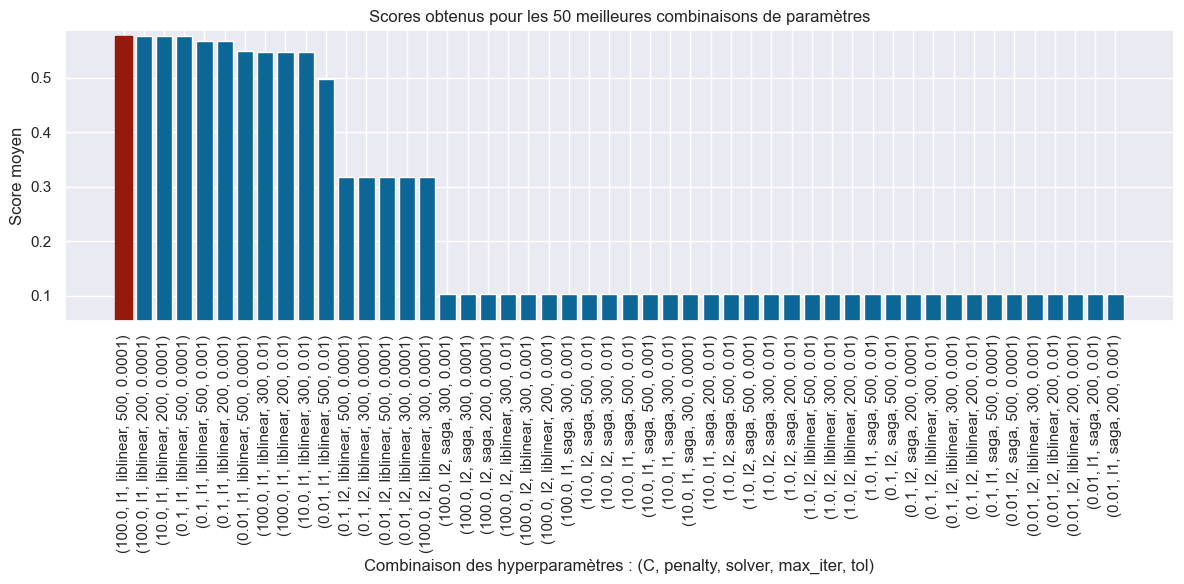

In [129]:
best_params = src.plot_gridsearch(rs_logreg_classifier, params)

In [130]:
logreg_classifier = LogisticRegression(
    penalty=best_params['penalty'],
    tol=best_params['tol'],
    C=best_params['C'],
    solver=best_params['solver'],
    max_iter=best_params['max_iter'],
)
logreg_classifier.fit(X_train, y_train)

LogisticRegression(C=100, max_iter=200, penalty='l1', solver='liblinear')

----------------------------------------------------------------------------------------------------

Global accuracy : 0.58039863678612
Global log loss : 1.2662365702801766
Global precision : 0.5554209098195826
Global recall : 0.5578041868240133
Global F1 score : 0.5495513210809028
Global ROC-AUC score : 0.8883649585844899

              Precision    Recall  F1 score
Alternative   0.422430  0.230848  0.298547
Anime         0.618367  0.615854  0.617108
Blues         0.487365  0.403789  0.441658
Classical     0.766544  0.829026  0.796562
Country       0.474643  0.554117  0.511310
Electronic    0.553927  0.553347  0.553637
Jazz          0.472574  0.338028  0.394135
Rap/Hip-Hop   0.704556  0.855562  0.772751
Rock          0.498382  0.639668  0.560255

----------------------------------------------------------------------------------------------------


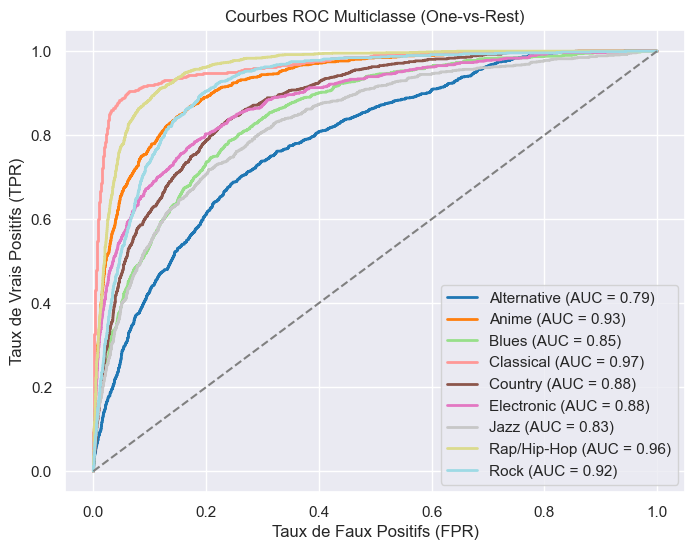

----------------------------------------------------------------------------------------------------


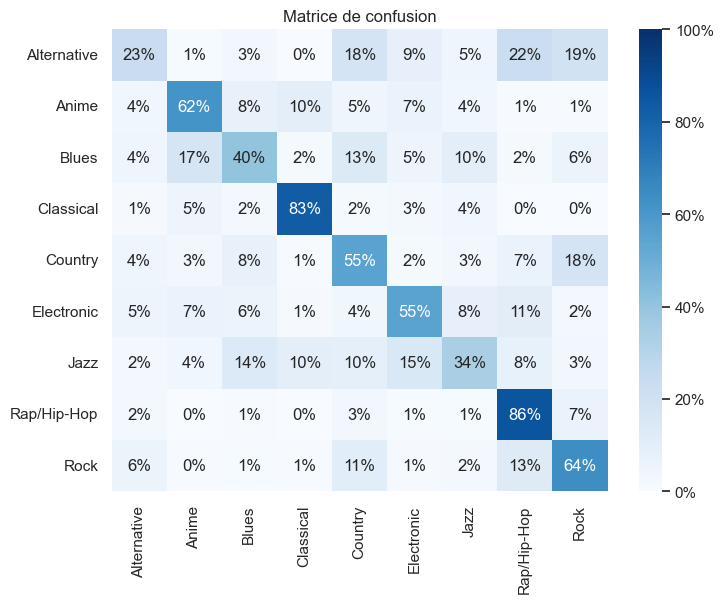

----------------------------------------------------------------------------------------------------


In [131]:
src.evaluate_model(logreg_classifier, X_test, y_test, classes=config.CLASSES_COMBINED_RAP_HIPHOP)

In [132]:
src.save_model(logreg_classifier, 'logreg_classifier')

Modèle et ses métadonnées sauvegardées dans : /Users/lucascaio/Desktop/Fac/Master/M2/Bloc de base/Apprentissage statistique/music-genre-prediction/models


---